# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("x_train minimum value: ", x_train.min())
print("x_train maximum value:", x_train.max())
print("x_test minimum value: ", x_train.min())
print("x_test maximum value:",  x_train.max())
print("y_train.shape: ", y_train.shape)
print("classes: ", len(np.unique(y_train)))
print("y_train minimum value: ", y_train.min())
print("y_train, maximum value: ", y_train.max())



x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
x_train minimum value:  0
x_train maximum value: 255
x_test minimum value:  0
x_test maximum value: 255
y_train.shape:  (50000, 1)
classes:  100
y_train minimum value:  0
y_train, maximum value:  99


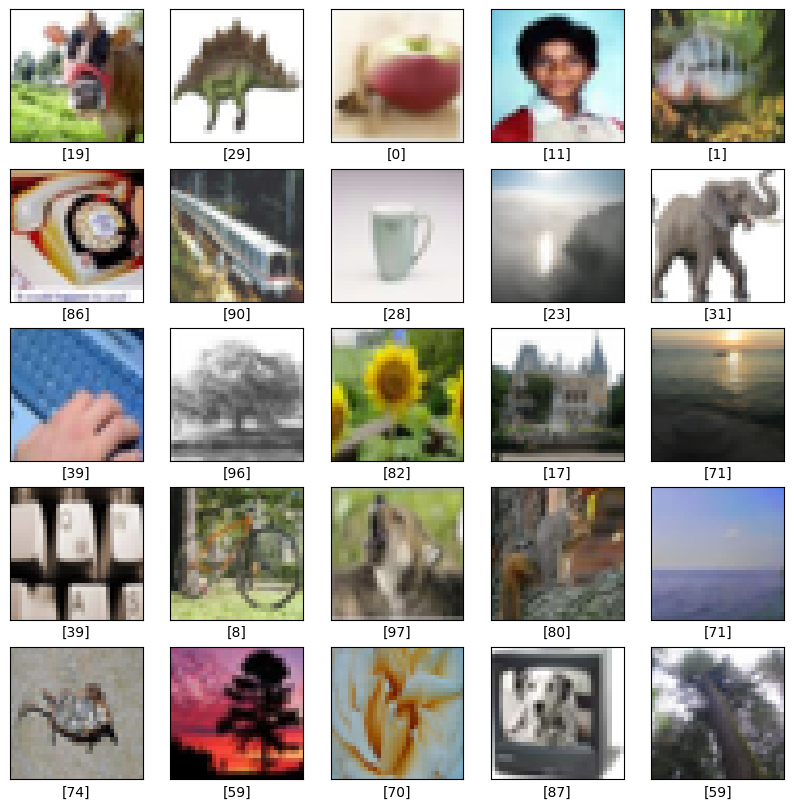

In [4]:
# Example image from the training set
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Rescale the images so they have pixel values in [0,1]

import tensorflow as tf
from tensorflow.keras.layers import Rescaling

rescale = Rescaling(scale=1./255, offset=0.0)

x_train = rescale(x_train)
print(x_train[0])

tf.Tensor(
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.76470596 0.80392164 0.7568628 ]
  [0.8313726  0.87843144 0.8000001 ]
  [0.7137255  0.7607844  0.654902  ]]

 [[1.         1.         1.        ]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  ...
  [0.6666667  0.6901961  0.5882353 ]
  [0.6313726  0.65882355 0.50980395]
  [0.57254905 0.6039216  0.4431373 ]]

 [[1.         1.         1.        ]
  [0.9960785  0.9960785  0.9960785 ]
  [1.         1.         1.        ]
  ...
  [0.7411765  0.7803922  0.6627451 ]
  [0.6509804  0.69803923 0.50980395]
  [0.47450984 0.52156866 0.34117648]]

 ...

 [[0.5803922  0.7254902  0.30980393]
  [0.5568628  0.7137255  0.22352943]
  [0.54901963 0.7019608  0.23529413]
  ...
  [0.11764707 0.06666667 0.00392157]
  [0.25490198 0.24313727 0.05882353]
  [0.29803923 0.3019608  0.07843138]]

 [[0.4784314  0.6156863  0.25882354]
  [0.47058827 0.60784316 0

In [6]:
from tensorflow.keras.utils import to_categorical
# Use OneHotEncoding to encode classes

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')

After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [7]:
# Split x_train, into training and validation set
from sklearn.model_selection import train_test_split
import random

data = np.asarray(x_train, dtype='float32')
target = np.asarray(y_train, dtype='int32')

x_train, x_val, y_train, y_val = train_test_split(
    data, target, test_size=0.2, random_state=42)

print('x_train: ', x_train.shape)
print('x_val: ', x_val.shape)
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)




x_train:  (40000, 32, 32, 3)
x_val:  (10000, 32, 32, 3)
y_train:  (40000, 100)
y_val:  (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout


model = Sequential()

# Input layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

# Output layer, dimnension= number of classes
model.add(Dense(100, activation='softmax'))

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         627,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 628,196 (2.40 MB)

 Trainable params: 628,196 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [26]:
from keras import optimizers

optimizer = 'adam'
loss = 'f1score'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.0295 - loss: 0.0194 - val_accuracy: 0.0653 - val_loss: 0.0187
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.0675 - loss: 0.0187 - val_accuracy: 0.0671 - val_loss: 0.0187
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.0780 - loss: 0.0185 - val_accuracy: 0.0856 - val_loss: 0.0183
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.0919 - loss: 0.0182 - val_accuracy: 0.0881 - val_loss: 0.0183
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.0991 - loss: 0.0181 - val_accuracy: 0.0994 - val_loss: 0.0181
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.1110 - loss: 0.0178 - val_accuracy: 0.1075 - val_loss: 0.0179
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.1190 - loss: 0.0177 - val_accuracy: 0.1058 - val_loss: 0.0179
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.1229 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ___16.8%___
- <b>Other metric:</b> __f1score 0.017%____
- <b>Reason for selection:</b> __This metric is appropriate for classification problems -- the harmonic mean or precision and recall. So it helps to balance the measure of false positives and fals negatives_
- <b>Value of metric:</b> ___0.017%_____
- <b>Interpretation of metric value:</b> ____It means the model is not perfoming well, as this is very low.__

In [11]:
# Evaluate the model on the test set
results = model.evaluate(x_test, y_test)

# Loss and Accuracy
test_loss = results[0]
test_accuracy = results[1]

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0647 - loss: 0.0187
Test Loss: 0.018641101196408272
Test Accuracy: 0.06790000200271606


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

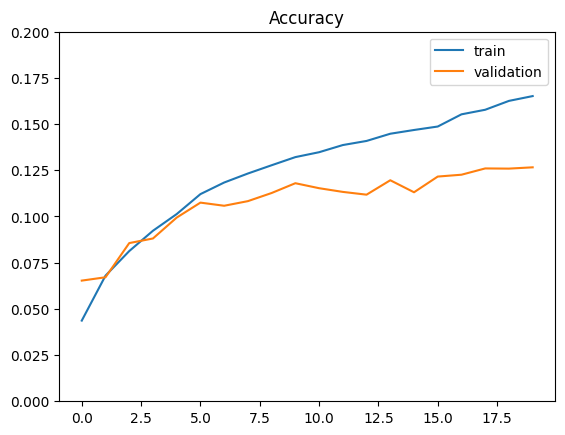

In [12]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 0.2)
plt.legend(loc='best')
plt.xlabel("")
plt.title('Accuracy');

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [17]:
model_enhanced = Sequential()
# Input layer
model_enhanced.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_enhanced.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_enhanced.add(Dropout(0.2))

model_enhanced.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model_enhanced.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_enhanced.add(Dropout(0.3))

model_enhanced.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model_enhanced.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_enhanced.add(GlobalAveragePooling2D())


model_enhanced.add(Dropout(0.5))
# Output layer, dimension = number of classes

model_enhanced.add(Dense(100, activation='softmax'))

model_enhanced.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,804 (753.14 KB)

 Trainable params: 192,804 (753.14 KB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [18]:
model_enhanced.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [19]:
history_2 = model_enhanced.fit(x_train, y_train,
                    batch_size=32, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 113ms/step - accuracy: 0.0107 - loss: 0.0198 - val_accuracy: 0.0107 - val_loss: 0.0198
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 118ms/step - accuracy: 0.0095 - loss: 0.0198 - val_accuracy: 0.0107 - val_loss: 0.0198
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 117ms/step - accuracy: 0.0090 - loss: 0.0198 - val_accuracy: 0.0107 - val_loss: 0.0198
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 190s 107ms/step - accuracy: 0.0106 - loss: 0.0198 - val_accuracy: 0.0261 - val_loss: 0.0194
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 106ms/step - accuracy: 0.0266 - loss: 0.0195 - val_accuracy: 0.0385 - val_loss: 0.0192
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 109ms/step - accuracy: 0.0348 - loss: 0.0193 - val_accuracy: 0.0417 - val_loss: 0.0192
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.0369 - loss: 0.0193 - val_accuracy: 0.0418 - val_loss: 0.0192
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - ac

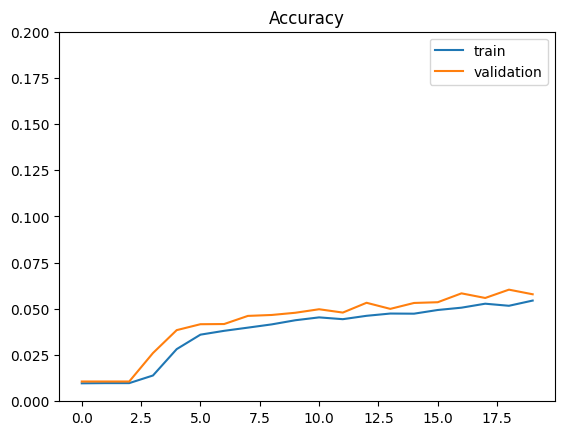

In [20]:
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='validation')
plt.ylim(0, 0.2)
plt.legend(loc='best')
plt.xlabel("")
plt.title('Accuracy');

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


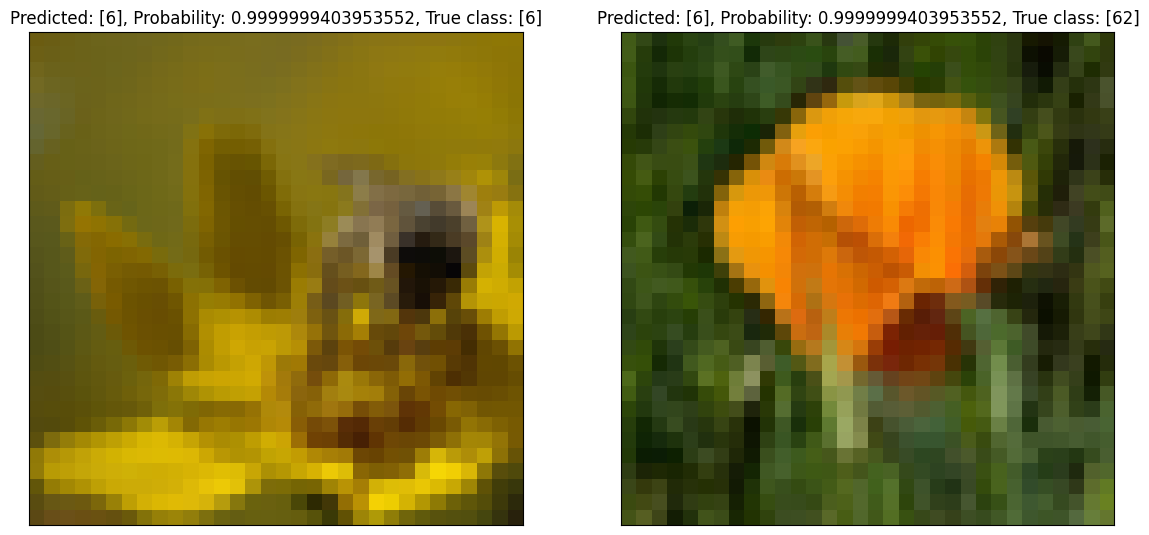

In [23]:
# Get predictions for  test data
predictions = model_enhanced.predict(x_test)

# Get probability of most confident predictions
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get correctly classified samples
classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Randomly pick one misclassified sample and one correctly classified sample
classified_index = classified_indices[np.random.choice(len(classified_indices), 1)]
misclassified_index = misclassified_indices[np.random.choice(len(misclassified_indices), 1)]
indices = [classified_index, misclassified_index]

fig, axes = plt.subplots(1, 2, figsize=(14, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[indices[i]].squeeze())
    ax.set_title(f"Predicted: {predicted_classes[indices[i]]}, Probability: {predictions[indices[i]].max()}, True class: {true_classes[indices[i]]}")
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.



The model did not improve when additional convolutional and pooling layers were added. The image shown that is miscategorized is difficult to distinguish, so it is understandable that the model got this image wrong. However, the performance of the model actually declined with the added layers, instead of increasing.

Perhaps further turning of the parameters could improve the performance. Increasing the learning rate may help. I would maybe try resizing the image as it is of low quality.  This would also speed up the model which would allow for more epochs and may result in higher level of correct predictions.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.